In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# đọc dữ liệu file
df = pd.read_csv('Data/LordsMobileVN_clean.csv')

In [35]:
# Chuyển dữ liệu sang file để nhìn cho trực quan hơn
path ='Data/LordsMobileVN_clean.csv'
post_df = pd.DataFrame(df)
post_df.to_csv(path, index=False)

In [36]:
df_post = df
df_post['reactions'] = df_post['reactions'].apply(lambda x : dict(eval(x)) )
df_post_1 = df_post['reactions'].apply(pd.Series )
# Merge cột vào dataframe
df_post_2 = pd.concat([df_post, df_post_1], axis=1).drop('reactions', axis=1)
df_post_2= df_post_2.fillna(0)
df_post_2[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_17152\1155545642.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_post_1 = df_post['reactions'].apply(pd.Series )


,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,54.0,4.0,1.0,0.0,0.0,0.0,0.0,2,4,59
1,"🥹 Không có so sánh, không có đau thương",97.0,0.0,25.0,0.0,0.0,0.0,0.0,1,17,122
2,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l...",130.0,3.0,30.0,1.0,1.0,0.0,0.0,0,22,165
3,0,91.0,2.0,6.0,0.0,0.0,0.0,0.0,0,17,99
4,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...,96.0,2.0,0.0,0.0,0.0,0.0,0.0,1,244,98
...,...,...,...,...,...,...,...,...,...,...,...
195,Mời các nông dân vườn khoai trả lời ạ !,183.0,2.0,44.0,2.0,2.0,1.0,0.0,0,79,234
196,"Sau bao nhiêu năm, người đàn ông tôi cần nhất ...",96.0,3.0,27.0,0.0,0.0,0.0,1.0,1,43,127
197,🧑‍⚕️ Nào mình cùng đến thăm bệnh nhân tại Thán...,176.0,3.0,164.0,2.0,3.0,0.0,2.0,1,57,350
198,Chào tháng 8 cùng nhiều sự kiện hấp dẫn diễn r...,132.0,7.0,1.0,0.0,0.0,0.0,0.0,1,27,140


# Phân tích comment

In [37]:
# tổng số lượng comment
sum(df_post.comments)

12543

In [38]:
# số lượng comment trung bình
df_post.comments.mean()

62.715

In [39]:
# số lượng comment của các bài đăng dao động trong khoảng
df_post.comments.median()

33.5

<Axes: xlabel='index'>

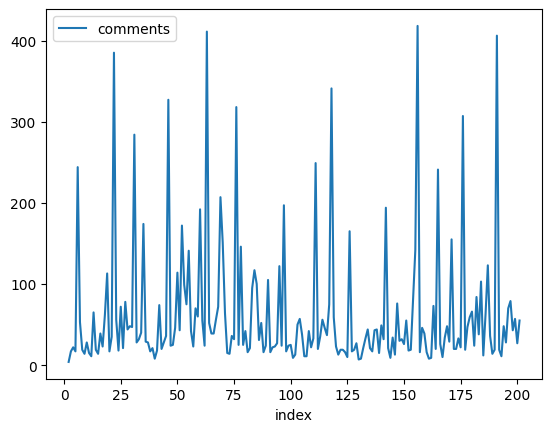

In [40]:
# biến động số lượt comment qua từng bài đăng
# thêm index cho dataframe
df_post = df_post.reset_index(inplace = False)
df_post["index"] = df_post["index"] + 1
df_post.plot(kind = "line", x = "index", y = "comments")